In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
new_df=sns.load_dataset("penguins")
new_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [70]:
print(new_df.info())
print("Missing Values:")
print(new_df.isnull().sum())
print("Duplicated values:")
print(new_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
Missing Values:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Duplicated values:
0


In [71]:
new_df.dropna(subset=["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex"],inplace=True)

In [72]:
print(new_df.head(10))

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
12  Adelie  Torgersen            41.1           17.6              182.0   
13  Adelie  Torgersen            38.6           21.2              191.0   
14  Adelie  Torgersen            34.6           21.1              198.0   

    body_mass_g     sex  
0        3750.0    Male  
1        3800.0  Female  
2        3250.0  Female  
4        3450.0  Female  
5        3650.0    Male  
6        3625.0  F

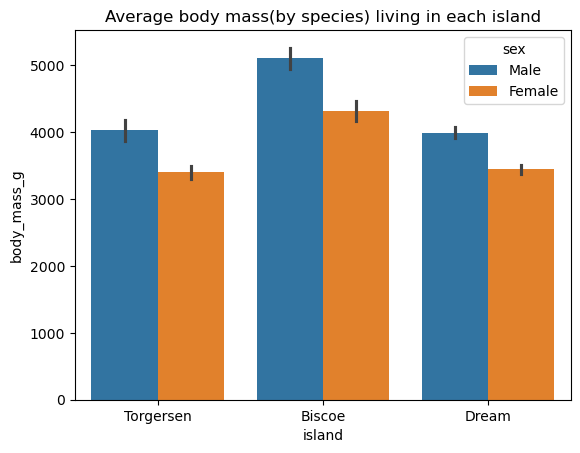

In [73]:
#species vs island
sns.barplot(x="island",y="body_mass_g",data=new_df,hue="sex")
plt.title("Average body mass(by species) living in each island",fontsize=12)
plt.show()

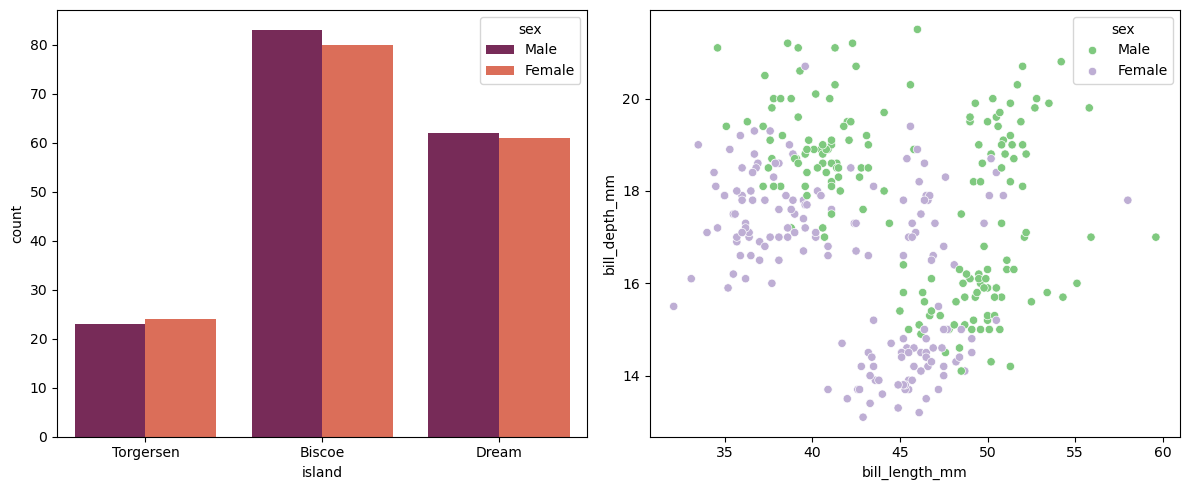

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#count of male vs female
sns.countplot(x="island",data=new_df,hue="sex",palette="rocket",ax=axes[0])

#bill_length vs bill_depth
sns.scatterplot(x="bill_length_mm",y="bill_depth_mm",data=new_df,hue="sex",palette="Accent",ax=axes[1])
plt.tight_layout()
plt.show()

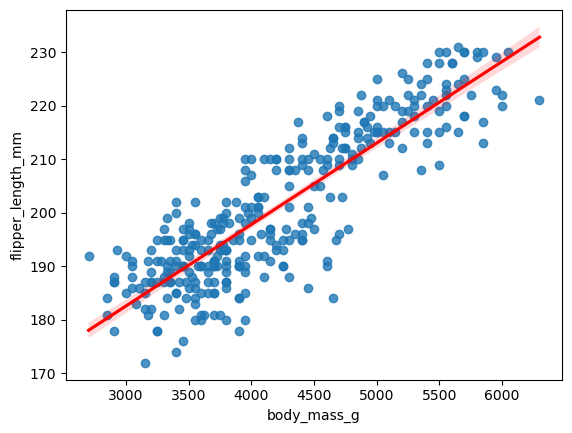

In [75]:
sns.regplot(x="body_mass_g",y="flipper_length_mm",data=new_df,line_kws={"color":"red"})
plt.show()

<Figure size 700x1400 with 0 Axes>

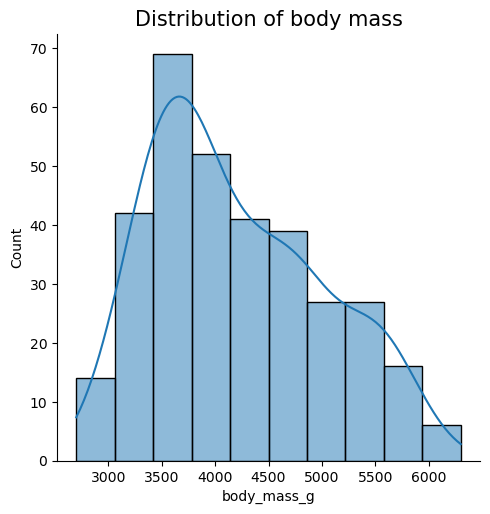

In [76]:
#distribution of body mass
plt.figure(figsize=(7,14))
sns.displot(x="body_mass_g",data=new_df,bins=10,kde=True)
plt.title("Distribution of body mass",fontsize=15)
plt.show()

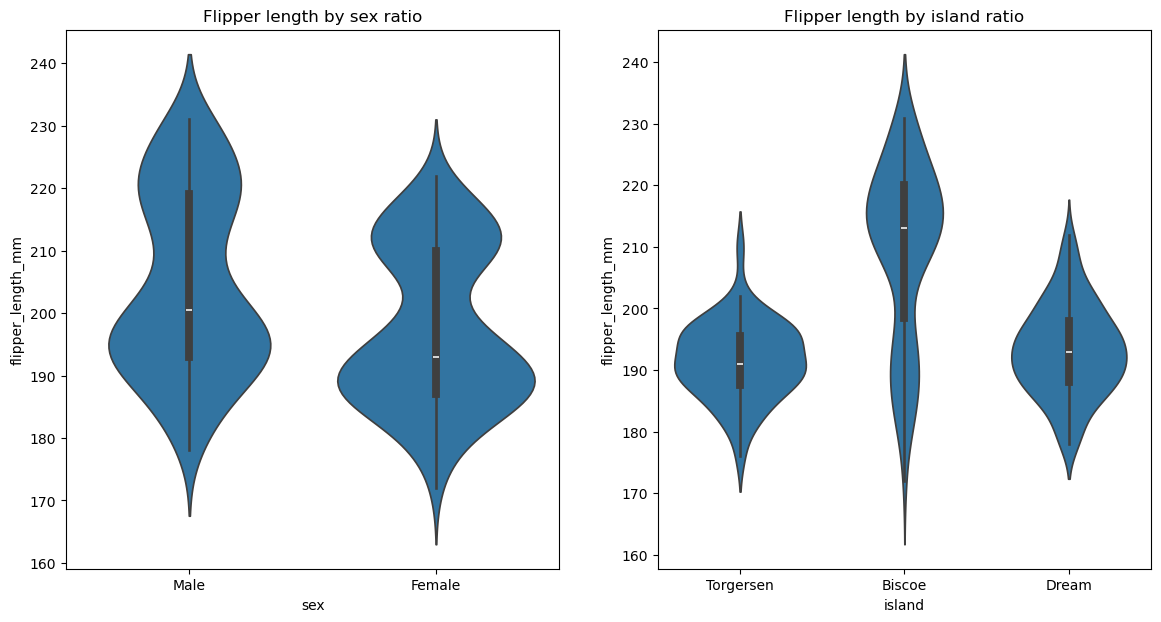

In [77]:
fig,axes=plt.subplots(1,2,figsize=(14,7))

#flipper length by sex ratio
sns.violinplot(x="sex",y="flipper_length_mm",data=new_df,ax=axes[0])
axes[0].set_title("Flipper length by sex ratio")

#flipper_length by island ratio
sns.violinplot(x="island",y="flipper_length_mm",data=new_df,ax=axes[1])
axes[1].set_title("Flipper length by island ratio")
plt.show()

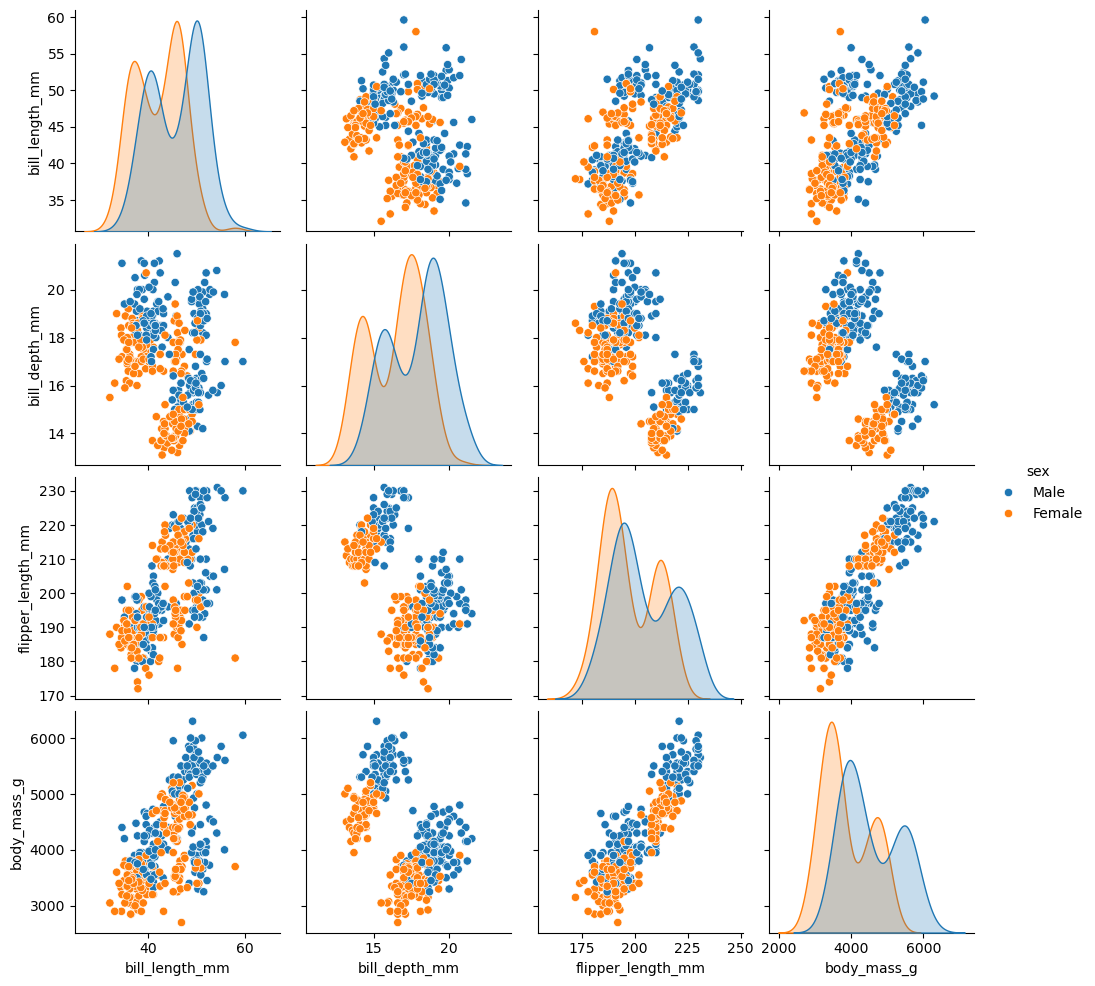

In [6]:
#pairplot
sns.pairplot(data=new_df,hue="sex")
plt.savefig('numeric_analysis.png')
plt.show()